![](https://diginomica.com/wp-content/uploads/2015/10/american-airlines1.jpg)

# 1. Import

In [1]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter

# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential

# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D



# Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#print(os.listdir("../input"))

C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [2]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today() 

# 2. Read Data

In [10]:
input_directory = r"C:\\Users\\Win 1809 UEFI\\Desktop\\1.csv"
output_directory = r"C:\\Users\\Win 1809 UEFI\\Desktop\\Tweetss.csv"

if not os.path.exists(output_directory):
    os.mkdir(output_directory)
    
figure_directory = "C:\\Users\\Win 1809 UEFI\\Desktop\\figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

In [3]:
df = pd.read_csv("C:\\Users\\Win 1809 UEFI\\Desktop\\001.csv")

In [4]:
df.head()

,airline,review_date,Type_Of_Traveller,seat_type,Seat_Comfort,Cabin_Staff,Food_Beverages,Inflight_Entertainment,Ground_Service,Wifi_Connectivity,Value_Money,airline_sentiment,Recommended,overal_rating,title,review,pos,neg,neu,compound
0,air arabia,2015,Family Leisure,Economy Class,5.0,4.0,NaN,NaN,3.0,NaN,3,Neutral,0,3,seats offer good legroom,"I travelled Air Arabia from Delhi to Sharjah, ...",0.049,0.181,0.771,-0.7845
1,air arabia,2015,Family Leisure,Economy Class,3.0,3.0,1.0,1.0,1.0,NaN,2,Positive,0,1,very bad experience,Amman to Kuwait. I had a very bad experience w...,0.013,0.153,0.835,-0.9274
2,air arabia,2015,Solo Leisure,Economy Class,2.0,2.0,NaN,NaN,1.0,NaN,2,Negative,0,4,most economical ticket,That was my first experience on Air Arabia. I ...,0.159,0.121,0.720,0.5733
3,air arabia,2015,Business,Economy Class,1.0,3.0,1.0,2.0,2.0,1.0,3,Neutral,0,3,not a trustworthy airline,That was my first experience on Air Arabia. I ...,0.056,0.127,0.818,-0.4924
4,air arabia,2015,Family Leisure,Economy Class,4.0,4.0,4.0,2.0,3.0,2.0,4,Negative,1,6,Air Arabia customer review,"The flight was good, the price of the ticket w...",0.250,0.104,0.646,0.9300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 20 columns):
airline                   4854 non-null object
review_date               4854 non-null int64
Type_Of_Traveller         4854 non-null object
seat_type                 4854 non-null object
Seat_Comfort              4777 non-null float64
Cabin_Staff               4771 non-null float64
Food_Beverages            4576 non-null float64
Inflight_Entertainment    4328 non-null float64
Ground_Service            4819 non-null float64
Wifi_Connectivity         2223 non-null float64
Value_Money               4854 non-null int64
airline_sentiment         4854 non-null object
Recommended               4854 non-null int64
overal_rating             4854 non-null int64
title                     4854 non-null object
review                    4854 non-null object
pos                       4854 non-null float64
neg                       4854 non-null float64
neu                       4854 non-null flo

In [6]:
columns = df.columns
columns

Index(['airline', 'review_date', 'Type_Of_Traveller', 'seat_type',
       'Seat_Comfort', 'Cabin_Staff', 'Food_Beverages',
       'Inflight_Entertainment', 'Ground_Service', 'Wifi_Connectivity',
       'Value_Money', 'airline_sentiment', 'Recommended', 'overal_rating',
       'title', 'review', 'pos', 'neg', 'neu', 'compound'],
      dtype='object')

# 3. Visualize Data

[]

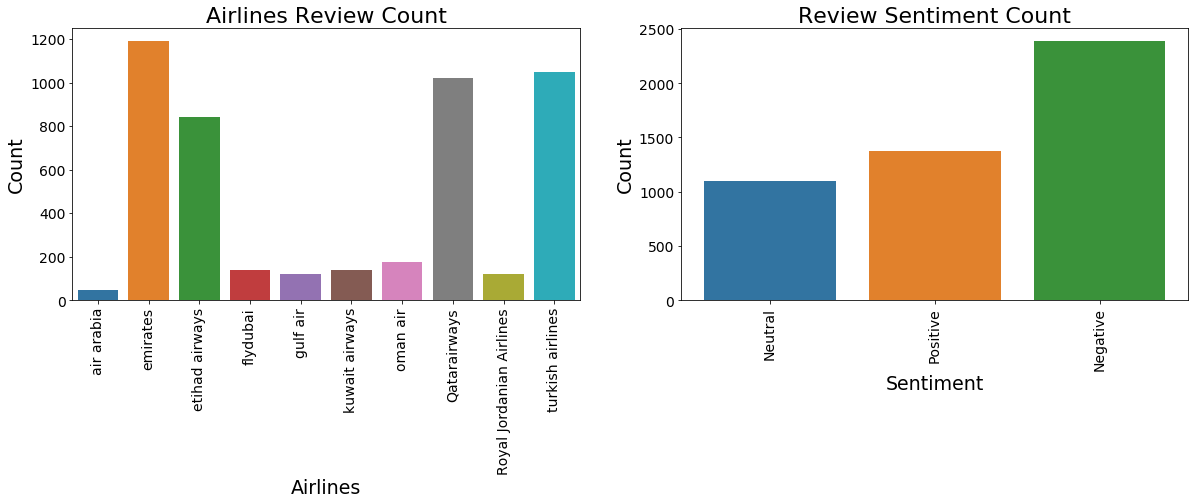

In [7]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

plt.subplot(121)
col = "airline"
xlabel = "Airlines"
ylabel = "Count"

sns.countplot(x=df[col])
plt.title("Airlines Review Count")
plt.xticks(rotation=90)
plt.xlabel(xlabel)
plt.ylabel(ylabel)


plt.subplot(122)
col = "airline_sentiment"
xlabel = "Sentiment"
ylabel = "Count"
sns.countplot(df[col])
plt.title("Review Sentiment Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

Note:
1. Most of the review present here are negative.
2. Highest number of tweets are about "United Airlines", "US Airlines" and "American Airlines"

[]

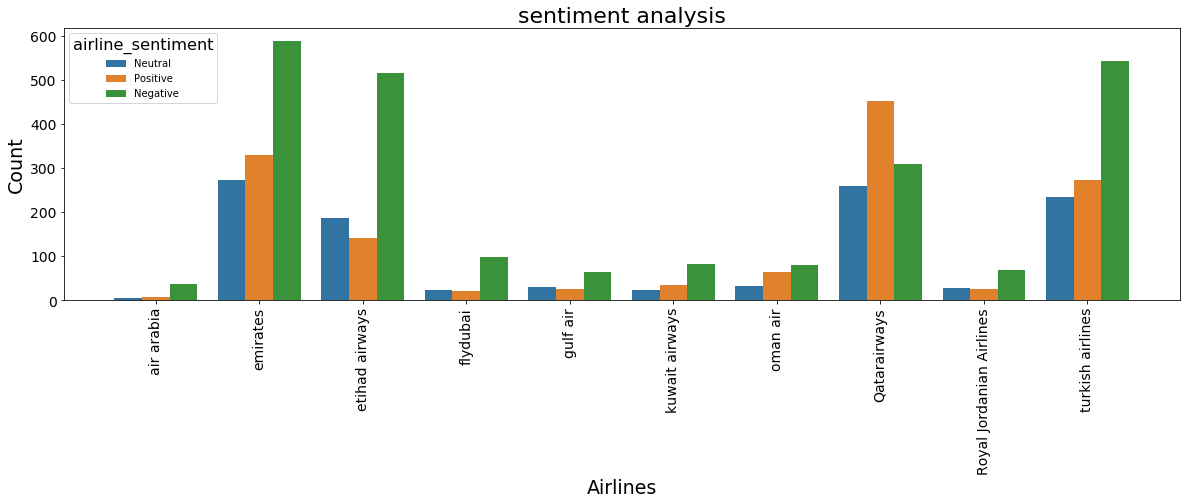

In [8]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Airlines"
ylabel = "Count"

title = "sentiment analysis"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "airline"
col2 = "airline_sentiment"
sns.countplot(x=df[col1], hue=df[col2])
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

Note:
1. Most of the negative tweets are about "Customer Service Issue".

[]

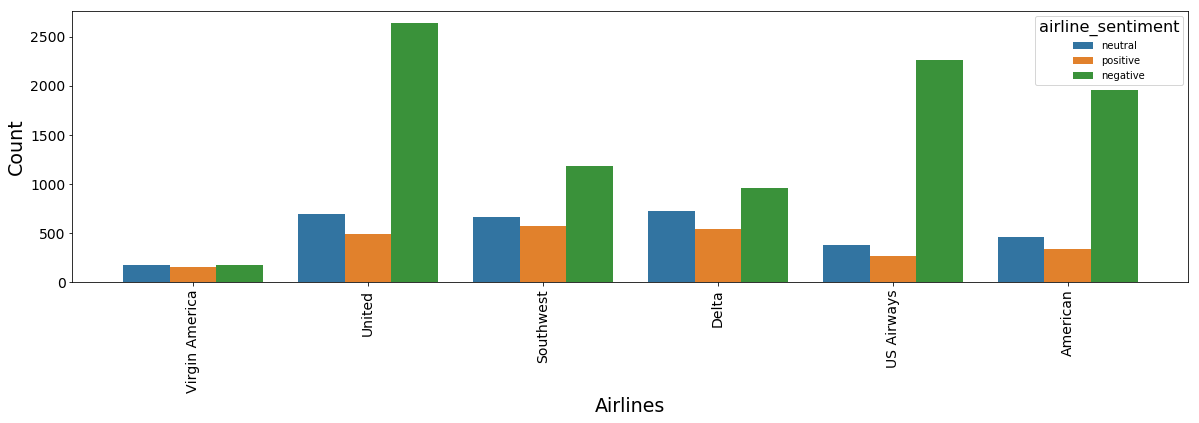

In [10]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Airlines"
ylabel = "Count"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

plt.figure(figsize=figsize)
col1 = "airline"
col2 = "airline_sentiment"
sns.countplot(x=df[col1], hue=df[col2])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()


C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

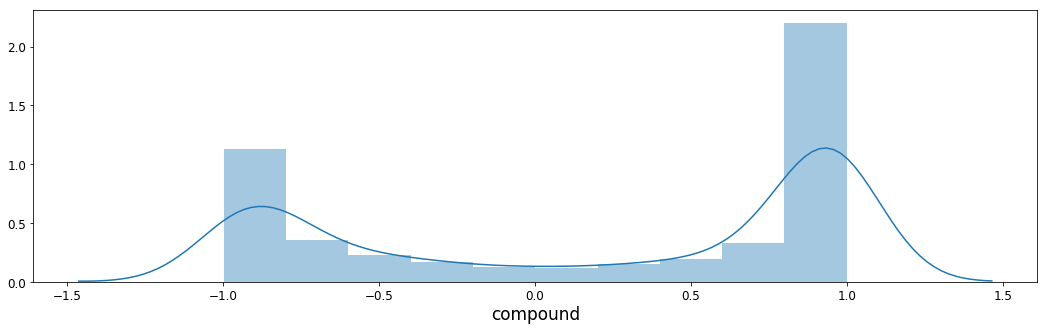

In [10]:
x = df["compound"].fillna(-1)

figsize=(18, 5)

ticksize = 12
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)
sns.distplot(x)
plt.plot()

## 4. Training Model

In [13]:
from nltk.corpus import stopwords

X = df

X["review"] = X["review"].apply(lambda x: BeautifulSoup(x, "lxml").get_text())
X["review"] = X["review"].apply(lambda x: x.lower())
X["review"] = X["review"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
X["review"] = X["review"].apply(lambda x: re.sub("\s+", " ", x))

X = X[X["compound"]>0.5]

y = X["airline_sentiment"]
X = X["review"]

stopwords = stopwords.words('english')
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer(stop_words=stopwords)

X = vectorizer.fit_transform(X)

model = RandomForestClassifier(n_estimators=5, n_jobs=-1, class_weight='balanced', random_state=0)
# model = SVC()

print(cross_val_score(model, X, y, cv=3))  

[0.38       0.42285041 0.40919811]


## 5. Deep Learning

### 5.1 Output Configuration

In [15]:
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"

try:
    os.mkdir(main_model_dir)
except:
    print("Could not create main model directory")
    
try:
    os.mkdir(main_log_dir)
except:
    print("Could not create main log directory")



model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')


try:
    os.mkdir(model_dir)
except:
    print("Could not create model directory")
    
try:
    os.mkdir(log_dir)
except:
    print("Could not create log directory")
    
model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

NameError: name 'output_directory' is not defined

In [15]:
print("Settting Callbacks")

checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    verbose=1)


callbacks = [checkpoint, reduce_lr, early_stopping]

# callbacks = [early_stopping]

print("Set Callbacks at ", date_time(1))

Settting Callbacks
Set Callbacks at  Timestamp: 2019-03-16 15:18:56


### 5.2. Preprocessing

In [16]:
X = df.text
Y = df.airline_sentiment

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

Y = to_categorical(Y)

# Y = Y.reshape(-1, 1)
Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

# max_words = 1000
# max_len = 150
max_words, max_len

(12466, 176)

In [18]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [19]:
# Calculate Class Weights
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

In [20]:
class_weight = get_weight(Y_train.flatten())

### 5.3 Model

In [21]:
def get_rnn_model(num_class=2):
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(LSTM(256))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    
    return model


def get_cnn_model(num_class=2):   
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    
    model.add(Conv1D(1024, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(2048, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    return model

In [22]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['acc']
    y2 = history.history['val_acc']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()


In [23]:
num_class = 3
model1 = get_rnn_model(num_class=num_class)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 176, 100)          1246600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
__________

In [24]:
loss = 'categorical_crossentropy'
# loss = 'binary_crossentropy'
metrics = ['accuracy']

## 10.3. Model Trainning

### 10.3.1. RNN

In [25]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")

history1 = model1.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2019-03-16 15:18:57


Compliling Model ...

Trainning Model ...

Train on 9955 samples, validate on 2489 samples
Epoch 1/100
9955/9955 [==============================] - 29s 3ms/step - loss: 1.4276 - acc: 0.5213 - val_loss: 0.9035 - val_acc: 0.6689
Epoch 2/100
9955/9955 [==============================] - 27s 3ms/step - loss: 0.8321 - acc: 0.6702 - val_loss: 0.6435 - val_acc: 0.7405
Epoch 3/100
9955/9955 [==============================] - 27s 3ms/step - loss: 0.5275 - acc: 0.7827 - val_loss: 0.6807 - val_acc: 0.7589

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/100
9955/9955 [==============================] - 27s 3ms/step - loss: 0.3445 - acc: 0.8693 - val_loss: 0.8868 - val_acc: 0.7087

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 5/100
9955/9955 [==============================] - 27s 3ms/step - loss: 0.2687 - acc: 0.8983 - val_loss: 0.6964 - val_acc: 0.7702

Epoch 00005: ReduceL

#### 10.3.1.2  Visualization

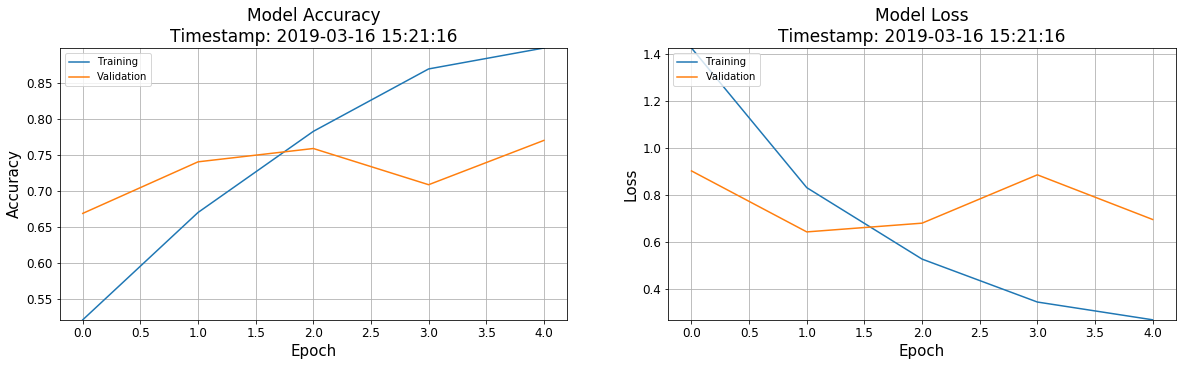

In [26]:
plot_performance(history=history1)

### 10.3.1. RNN

In [27]:
num_class = 3
model2 = get_cnn_model(num_class=num_class)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 176, 100)          1246600   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 174, 1024)         308224    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              2099200   
__________

In [28]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")

history2 = model2.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2019-03-16 15:21:16


Compliling Model ...

Trainning Model ...

Train on 9955 samples, validate on 2489 samples
Epoch 1/100
9955/9955 [==============================] - 5s 500us/step - loss: 1.4042 - acc: 0.5215 - val_loss: 0.6624 - val_acc: 0.7368
Epoch 2/100
9955/9955 [==============================] - 2s 168us/step - loss: 0.8706 - acc: 0.6809 - val_loss: 0.6180 - val_acc: 0.7429
Epoch 3/100
9955/9955 [==============================] - 2s 168us/step - loss: 0.6106 - acc: 0.7645 - val_loss: 0.5908 - val_acc: 0.7553
Epoch 4/100
9955/9955 [==============================] - 2s 169us/step - loss: 0.4498 - acc: 0.8310 - val_loss: 0.5640 - val_acc: 0.7867
Epoch 5/100
9955/9955 [==============================] - 2s 168us/step - loss: 0.3546 - acc: 0.8670 - val_loss: 0.5955 - val_acc: 0.7758

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/100
9955/9955 [==============================] - 2s 167us/step - loss: 0.2523 - acc: 0.90

#### 10.3.1.2 Visualization

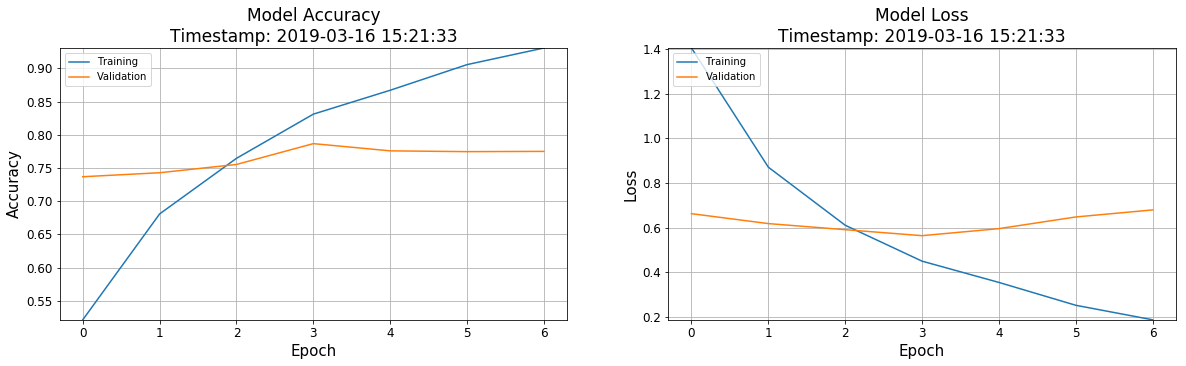

In [29]:
plot_performance(history=history2)

## 10.5 Inference/ Prediction

In [30]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
accuracy1 = model1.evaluate(test_X_seq, Y_test)
accuracy2 = model2.evaluate(test_X_seq, Y_test)

2196/2196 [==============================] - 0s 74us/step


### 10.5.1 Evaluation

In [31]:
print("Model Performance of RNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy1[1]*100, accuracy1[0]))

print("\nModel Performance of RNN (Test Accuracy):")
print('v: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy2[1]*100, accuracy2[0]))

Model Performance of RNN (Test Accuracy):
Accuracy: 74.27%
Loss: 0.684


Model Performance of RNN (Test Accuracy):
v: 79.64%
Loss: 0.563



In [32]:
ypreds1 = model1.predict_classes(test_X_seq, verbose=1)
ypreds2 = model2.predict_classes(test_X_seq, verbose=1)

2196/2196 [==============================] - 0s 147us/step


In [33]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

In [34]:
# print(classification_report(Y_test, ypreds1))

In [36]:
# print(classification_report(Y_test, ypreds2))

#### 10.5.1.2 Visualization

In [37]:
# plot_confusion_matrix(Y_test, ypreds2, title="CNN")

In [38]:
result = pd.DataFrame({'model': 'RNN', 'score': accuracy1[1]*100}, index=[-1])
row2 = pd.DataFrame({'model': 'CNN', 'score': accuracy2[1]*100}, index=[-1])
result = pd.concat([row2, result.ix[:]]).reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


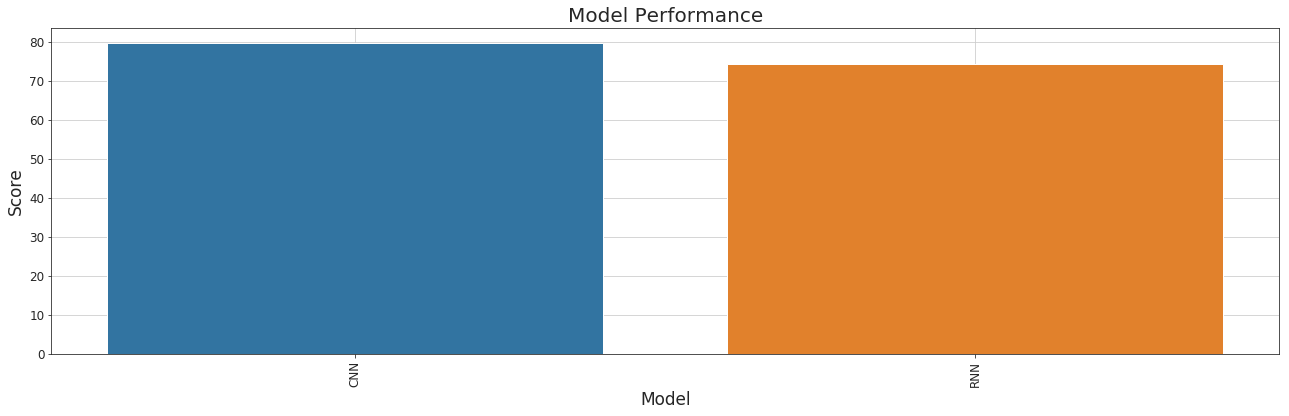

  model      score
0   CNN  79.644809
1   RNN  74.271403


In [39]:
plot_model_performace(result)